# Unsupervised Learning

When there is no label(target) available for the input features we try to cluster them based on various conditions thinking that similar objects will sit together.

![Example Image](add.png)
[Original Post Click](https://builtin.com/data-science/unsupervised-learning-python)

## Plot for labeled Iris Dataset for it's classes Setosa, Versicolor and Virginica

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


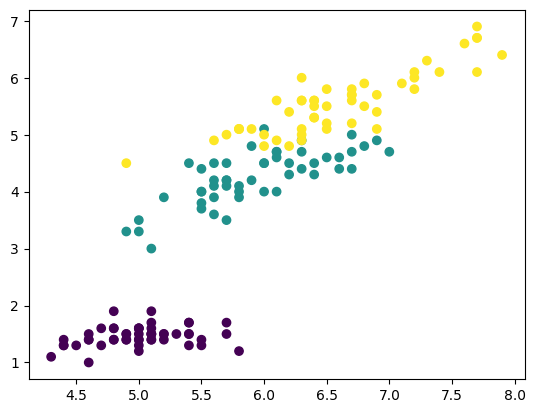

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

# load the data
iris_df = datasets.load_iris()
# available methods on dataset
print(dir(iris_df))
# feature names
print(iris_df.feature_names)
# target names
print(iris_df.target_names)
label = {0:'red',1:'blue',2:'green'}

x_axis = iris_df.data[:,0] #sepal length
y_axis = iris_df.data[:,2] #sepal width

# plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

VIOLET: SETOSA, GREEN: VERSICOLOR, YELLOW: VIRGINICA

### Same classification done based on clustering in an unsupervised way using KMeans clustering.

K-means clustering is an iterative unsupervised clustering algorithm that aims to find local maxima in each iteration. Initially, desired number of clusters are chosen. In our example, we know there are three classes involved, so we program the algorithm to group the data into three classes by passing the parameter “n_clusters” into our k-means model. Randomly, three points (inputs) are assigned into three clusters. Based on the centroid distance between each point, the next given inputs are segregated into respected clusters and the centroids are re-computed for all the clusters.

/Users/solo/opt/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


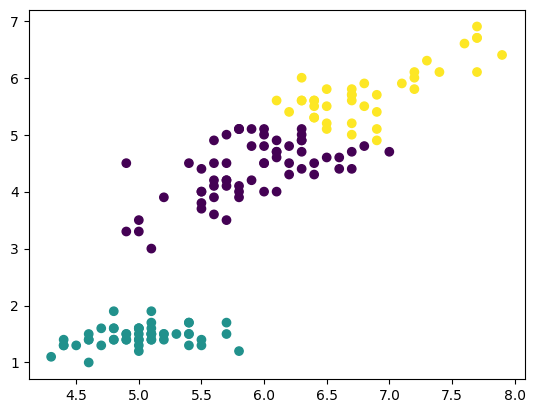

In [6]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(iris_df.data)

all_predictions = model.predict(iris_df.data)

x_axis = iris_df.data[:,0] #sepal length
y_axis = iris_df.data[:,2] #sepal width

# plotting
plt.scatter(x_axis, y_axis, c=all_predictions)
plt.show()

### t-SNE clustering

One of the unsupervised learning methods for visualization is t-distributed stochastic neighbor embedding, or t-SNE. It maps high-dimensional space into a two or three-dimensional space which can then be visualized. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

4 is the original dimensions of the data
2 is the reduced dimensions of the data


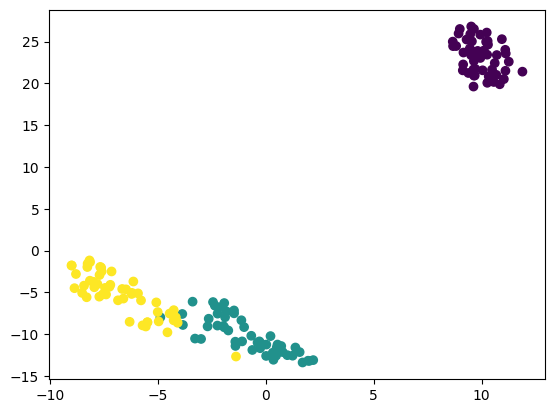

In [8]:
# Importing Modules
from sklearn.manifold import TSNE

# Defining Model
model1 = TSNE(learning_rate=100)

# Fitting Model
transformed = model1.fit_transform(iris_df.data)

print(len(iris_df.data[0]),"is the original dimensions of the data")
print(len(transformed[0]),"is the reduced dimensions of the data")

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

### DBSCAN Clustering

Density-based spatial clustering of applications with noise, or DBSCAN, is a popular clustering algorithm used as a replacement for k-means in predictive analytics. To run it doesn’t require an input for the number of clusters but it does need to tune two other parameters.

The scikit-learn implementation provides a default for the eps and min_samples parameters, but you’re generally expected to tune those. The eps parameter is the maximum distance between two data points to be considered in the same neighborhood. The min_samples parameter is the minimum amount of data points in a neighborhood to be considered a cluster.

[-1  0  1  2  3]


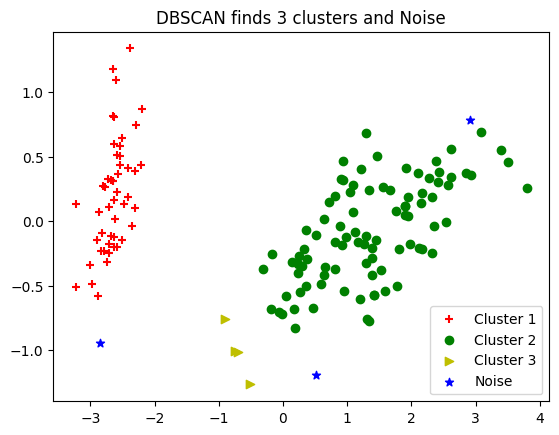

In [24]:
# Importing Modules
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


# Declaring Model
dbscan = DBSCAN(eps=0.6, min_samples=2)

# Fitting
dbscan.fit(iris_df.data)
print(np.unique(dbscan.labels_))

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris_df.data)
pca_2d = pca.transform(iris_df.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='>')
    elif dbscan.labels_[i] == -1:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2',"Cluster 3", 'Noise'])
plt.title('DBSCAN finds 3 clusters and Noise')
plt.show()